In [1]:
import yfinance as yf
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import nbimporter
import sys
sys.path.append('/Users/eugenedupas/Desktop/Code\ Python/PricerOptionsBS.py')

In [2]:
#Stock
start= pd.to_datetime("2019-05-12")
end= dt.datetime.now()
stock = yf.download("AAPL", start, end)
stock_adj = stock["Adj Close"]

[*********************100%%**********************]  1 of 1 completed


In [10]:
N = 1000 #Notional
K = 100  # Strike Price (Mettre prix actuel)
T = 3    # Maturity Date in year
t = 1    # Intermdediate Period in year
C = 0.08 # Coupon
H =1.0 # Barrier High
L = 0.9  # Barrier Low

In [4]:
Date_Observations = [start + pd.DateOffset(years=i) for i in range(t,T+1,t)]


[Timestamp('2020-05-12 00:00:00'),
 Timestamp('2021-05-12 00:00:00'),
 Timestamp('2022-05-12 00:00:00')]

In [11]:
def Coupons(N,K,T,t,C,H,L,stock_adj):
    Date_Observations = [start + pd.DateOffset(years=i) for i in range(t,T+1,t)]
    Coupons =[]
    for d in Date_Observations:
        if stock_adj.loc[d]/K > H:
            Coupons.append(N*(1+C))
            return Coupons
        if stock_adj.loc[d]/K > L and stock_adj.loc[d]/K < H:
            Coupons.append(N*C)
        else:
            Coupons.append(0)
    Coupons[-1] += N
    return Coupons
Coupons(N,K,T,t,C,H,L,stock_adj)

[0, 1080.0]

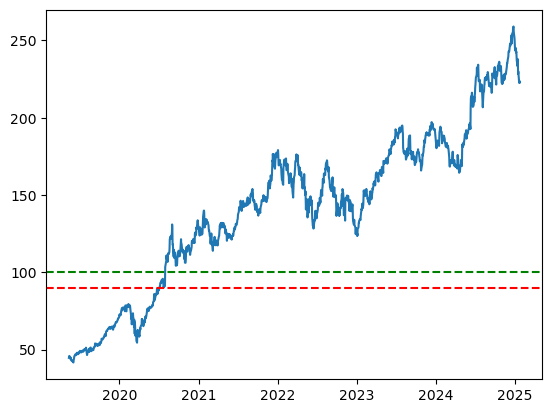

In [17]:
#Tracer avec seuilles et dates coupons 
plt.plot(stock_adj.index,stock_adj)
plt.axhline(y=H*K, color="green", linestyle="--", label=f"Seuil H = {H}")
plt.axhline(y=L*K, color="red", linestyle="--", label=f"Seuil L = {L}")
plt.show()